<a href="https://colab.research.google.com/github/UrjaPawar/DL_Workshop_HackClub/blob/main/HackClub_DL_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

# Dummy Data 

In [70]:
a = np.random.rand(100)
b = np.random.rand(100)
c = 2*a - 3.5*b + 2
c = (c>1).astype(int)
data = pd.DataFrame(columns = [0,1,2])
data[0],data[1],data[2] = a,b,c

##  plotting the data

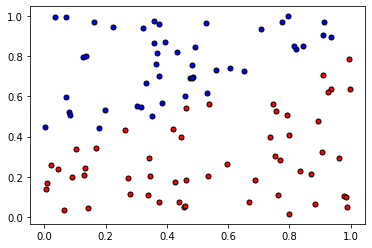

In [71]:
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [72]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return None

# Output (prediction) formula
def output_formula(features, weights, bias):
    return None

# Error (log-loss) formula
def error_formula(y, output):
    return None

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    weights = None
    bias = None
    return weights,bias
    

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [73]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

Streaming output truncated to the last 5000 lines.
new [ 1.76878441 -4.53493707]
weights and x [ 1.76878441 -4.53493707] [0.97717606 0.10665457]
diff 0.05630881764553919
new [ 1.76933465 -4.53487701]
weights and x [ 1.76933465 -4.53487701] [0.91077398 0.70357371]
diff 0.5010968361552239
new [ 1.77389851 -4.53135143]
weights and x [ 1.77389851 -4.53135143] [0.76864433 0.28508975]
diff 0.16091509350386168
new [ 1.77513537 -4.53089267]
weights and x [ 1.77513537 -4.53089267] [0.09034676 0.1997043 ]
diff 0.30218217369209655
new [ 1.77540839 -4.5302892 ]
weights and x [ 1.77540839 -4.5302892 ] [0.27900125 0.11449909]
diff 0.17349774778094362
new [ 1.77589245 -4.53009055]
weights and x [ 1.77589245 -4.53009055] [0.45450922 0.05284579]
diff 0.10396649717653828
new [ 1.77636498 -4.53003561]
weights and x [ 1.77636498 -4.53003561] [0.87041763 0.21330252]
diff 0.10274435849065922
new [ 1.77725929 -4.52981645]
weights and x [ 1.77725929 -4.52981645] [0.45897235 0.05684686]
diff 0.1046662379984069

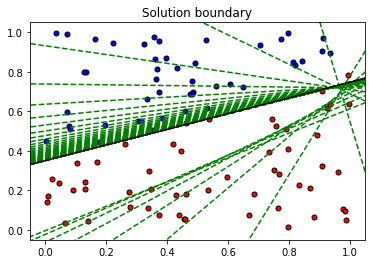

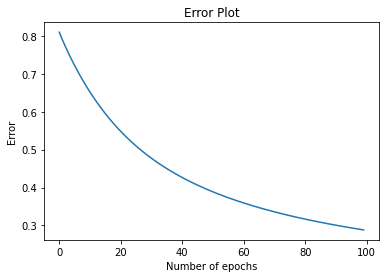

In [74]:
train(X, y, epochs, learnrate, True)